In [85]:
import pandas as pd
import numpy as np

In [86]:
master_wine = pd.read_csv(r"D:\PG-DAI\MachineLearning\Dec 20 Decision Trees\Wine Data\winequality_red.csv\winequality_red.csv")

In [87]:
master_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
master_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(master_wine.loc[:,master_wine.columns != 'quality'], master_wine['quality'], stratify=master_wine['quality'], random_state=42)

In [90]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)


In [91]:
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6


In [92]:
from sklearn.model_selection import GridSearchCV

gd= GridSearchCV(clf,{'max_depth':[3,4,5,6,7,8,9,10,11,23,45,63, 14, 43, 50],'criterion':['gini','entropy']},cv=10)
gd.fit(X_train,y_train)
print(gd.best_params_)
print(gd.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


{'criterion': 'entropy', 'max_depth': 63}
0.6271568627450981


In [93]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(master_wine)
pca.explained_variance_ratio_

array([9.46079514e-01, 4.83483474e-02, 2.59599087e-03, 1.52288677e-03,
       1.04910404e-03, 3.34987986e-04, 3.10082440e-05, 1.93440109e-05,
       9.43889374e-06, 8.17881393e-06, 1.19899823e-06, 4.68306222e-10])

In [94]:
pca.explained_variance_ratio_.cumsum()


array([0.94607951, 0.99442786, 0.99702385, 0.99854674, 0.99959584,
       0.99993083, 0.99996184, 0.99998118, 0.99999062, 0.9999988 ,
       1.        , 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

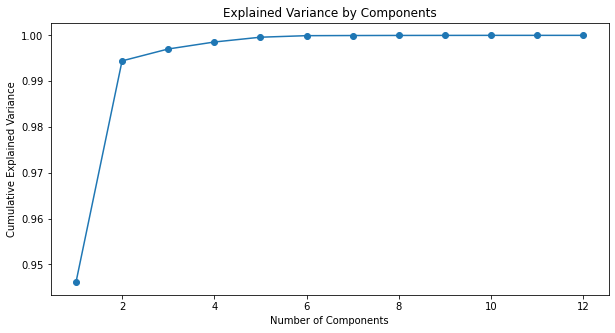

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot (range (1,13), pca.explained_variance_ratio_.cumsum (), marker = 'o')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


In [96]:

pca=PCA(n_components= 2)
pca.fit(master_wine)
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.94607951, 0.99442786])

In [97]:
pca_df= pca.transform(master_wine)
print(pca_df)


[[-13.22202658  -2.03192212]
 [ 22.04025471   4.40179054]
 [  7.16536169  -2.50832073]
 ...
 [ -3.43293096  14.27427694]
 [  1.13557385  16.30769238]
 [ -3.87592057   3.13011173]]


In [98]:
# PCA1=pca_df[0]

# PCA2=pca_df[1]

pca_df

array([[-13.22202658,  -2.03192212],
       [ 22.04025471,   4.40179054],
       [  7.16536169,  -2.50832073],
       ...,
       [ -3.43293096,  14.27427694],
       [  1.13557385,  16.30769238],
       [ -3.87592057,   3.13011173]])

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df,master_wine['quality'], random_state=42)

In [100]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.54


In [101]:
from sklearn.model_selection import GridSearchCV

gd= GridSearchCV(clf,{'max_depth':[3,4,5,6,7,8,9,10,11,23,45,63, 14, 43],'criterion':['gini','entropy']},cv=10)

In [102]:
gd.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 23, 45, 63,
                                       14, 43]})

In [103]:
print(gd.best_params_)
print(gd.best_score_)

{'criterion': 'entropy', 'max_depth': 63}
0.5604901960784313
